# Chapter 4 - Classification

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as pt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split


#### 10 This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.  

In [180]:
weekly = pd.read_csv('./Datasets/Weekly.csv', index_col=0)
direction = weekly.Direction
weekly.Direction = weekly.Direction.map({'Down': 0, 'Up': 1})

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [181]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


As we can see average weekly return for S&P 500 stock index between 1990 and 2010 is 0.14% with standard deviation of 2.36%.

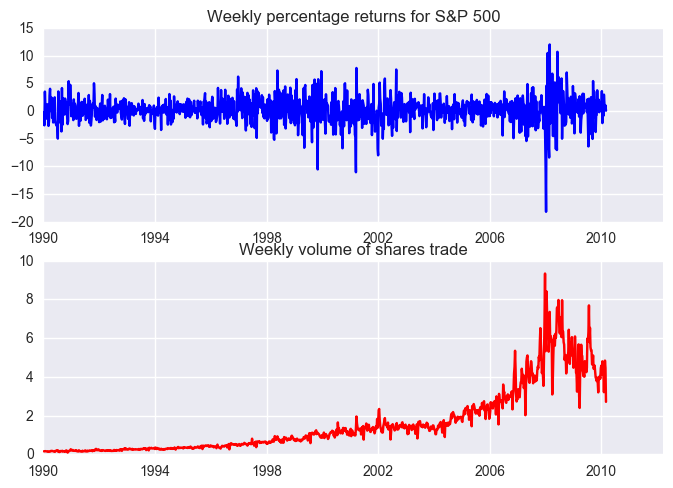

In [182]:
plt.subplot(211)
plt.plot(weekly.Today, 'b-')
plt.title('Weekly percentage returns for S&P 500')
plt.xticks(range(0, len(weekly), len(weekly)//20 * 4), range(1990, 2011, 4))
plt.subplot(212)
plt.plot(weekly.Volume, 'r-')
plt.title('Weekly volume of shares trade')
plt.xticks(range(0, len(weekly), len(weekly)//20 * 4), range(1990, 2011, 4))
plt.show()

In 2008-2009 S&P stock index was very volatile and also during this period we can see rapid increase in volume of shares trade.

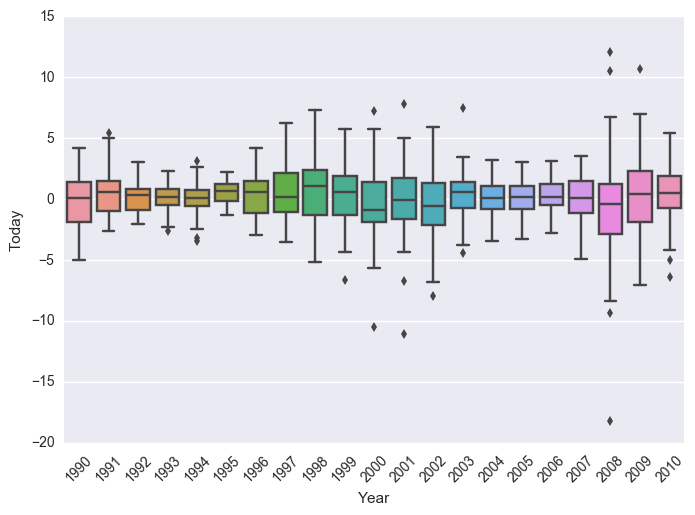

In [183]:
ax = sns.boxplot(x='Year', y='Today', data=weekly)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

On boxplots above you can see distribution of weekly returns for each year. As you can notice, there are h

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [184]:
full_log_model = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', weekly).fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [185]:
full_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 30 Nov 2016   Pseudo R-squ.:                0.006580
Time:                        10:07:50   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002         0.098     0.435
Lag1          -0.0413      0.026     -1.563      0.118        -0.093     0.010
Lag2           0.0584      0.027      2.175      0.030         0.006     0.111
Lag3          -0.0161      0.027     -0.602      0.547        -0.068     0.036
Lag4          -0.0278      0.026     -1.050      0.294        -0.080     0.024
Lag5          -0.0145      0.026     -0.549      0.583        -0.066     0.037
Volume        -0.0227      0.037     -0.616      0.538        -0.095     0.050
==============================================================================
"""

Lag2 is statistically significant (p-value<0.05)

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [186]:
direction_pred = np.where(full_log_model.predict() >=0.5, 'Up', 'Down')

In [187]:
# Actual x Predicted
confusion_matrix(direction, direction_pred, labels=['Down', 'Up'])

array([[ 54, 430],
       [ 48, 557]])

In [188]:
accuracy_score(direction, direction_pred)

0.56106519742883376

Confusion matrix shows that on training data model predicted 'Up' 430 times while true value was 'Down' and 'Down' value 48 times while true value was 'Up'. This fact shows, that model have high type II error (many false negative, in this case negative is 'Up').

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [189]:
weekly_train = weekly[weekly.Year<=2008]
weekly_test = weekly[weekly.Year>2008]
direction_train = direction[weekly.Year<=2008]
direction_test = direction[weekly.Year>2008]

In [190]:
lag2_log_model = smf.logit('Direction ~ Lag2', data=weekly_train).fit()
direction_loglag2_pred = np.where(lag2_log_model.predict(weekly_test)>=0.5, 'Up', 'Down')

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


In [191]:
confusion_matrix(direction_test, direction_loglag2_pred, labels=['Down', 'Up'])

array([[ 9, 34],
       [ 5, 56]])

In [192]:
accuracy_score(direction_test, direction_loglag2_pred)

0.625

Once again, type II error of prediction is high. Overall accuracy of the model is 62.5%.

(e) Repeat (d) using LDA.

In [193]:
lda_lag2_model = LinearDiscriminantAnalysis()
lda_lag2_model.fit(weekly_train[['Lag2']], direction_train)
direction_ldalag2_pred = lda_lag2_model.predict(weekly_test[['Lag2']])
confusion_matrix(direction_test, direction_ldalag2_pred, labels=['Down', 'Up'])

array([[ 9, 34],
       [ 5, 56]])

In [194]:
accuracy_score(direction_test, direction_ldalag2_pred)

0.625

(f) Repeat (d) using QDA.

In [195]:
qda_lag2_model = QuadraticDiscriminantAnalysis()
qda_lag2_model.fit(weekly_train[['Lag2']], direction_train)
direction_qdalag2_pred = qda_lag2_model.predict(weekly_test[['Lag2']])
confusion_matrix(direction_test, direction_qdalag2_pred, labels=['Down', 'Up'])

array([[ 0, 43],
       [ 0, 61]])

In [196]:
accuracy_score(direction_test, direction_qdalag2_pred)

0.58653846153846156

(g) Repeat (d) using KNN with K = 1.

In [197]:
knn1_lag2_model = KNeighborsClassifier(n_neighbors=1)
knn1_lag2_model.fit(weekly_train[['Lag2']], direction_train)
direction_knn1lag2_pred = knn1_lag2_model.predict(weekly_test[['Lag2']])
confusion_matrix(direction_test, direction_knn1lag2_pred, labels=['Down', 'Up'])

array([[21, 22],
       [31, 30]])

In [198]:
accuracy_score(direction_test, direction_knn1lag2_pred)

0.49038461538461536

(h) Which of these methods appears to provide the best results on this data?  

LDA and logistic regression showed best performance on test data.  

(i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

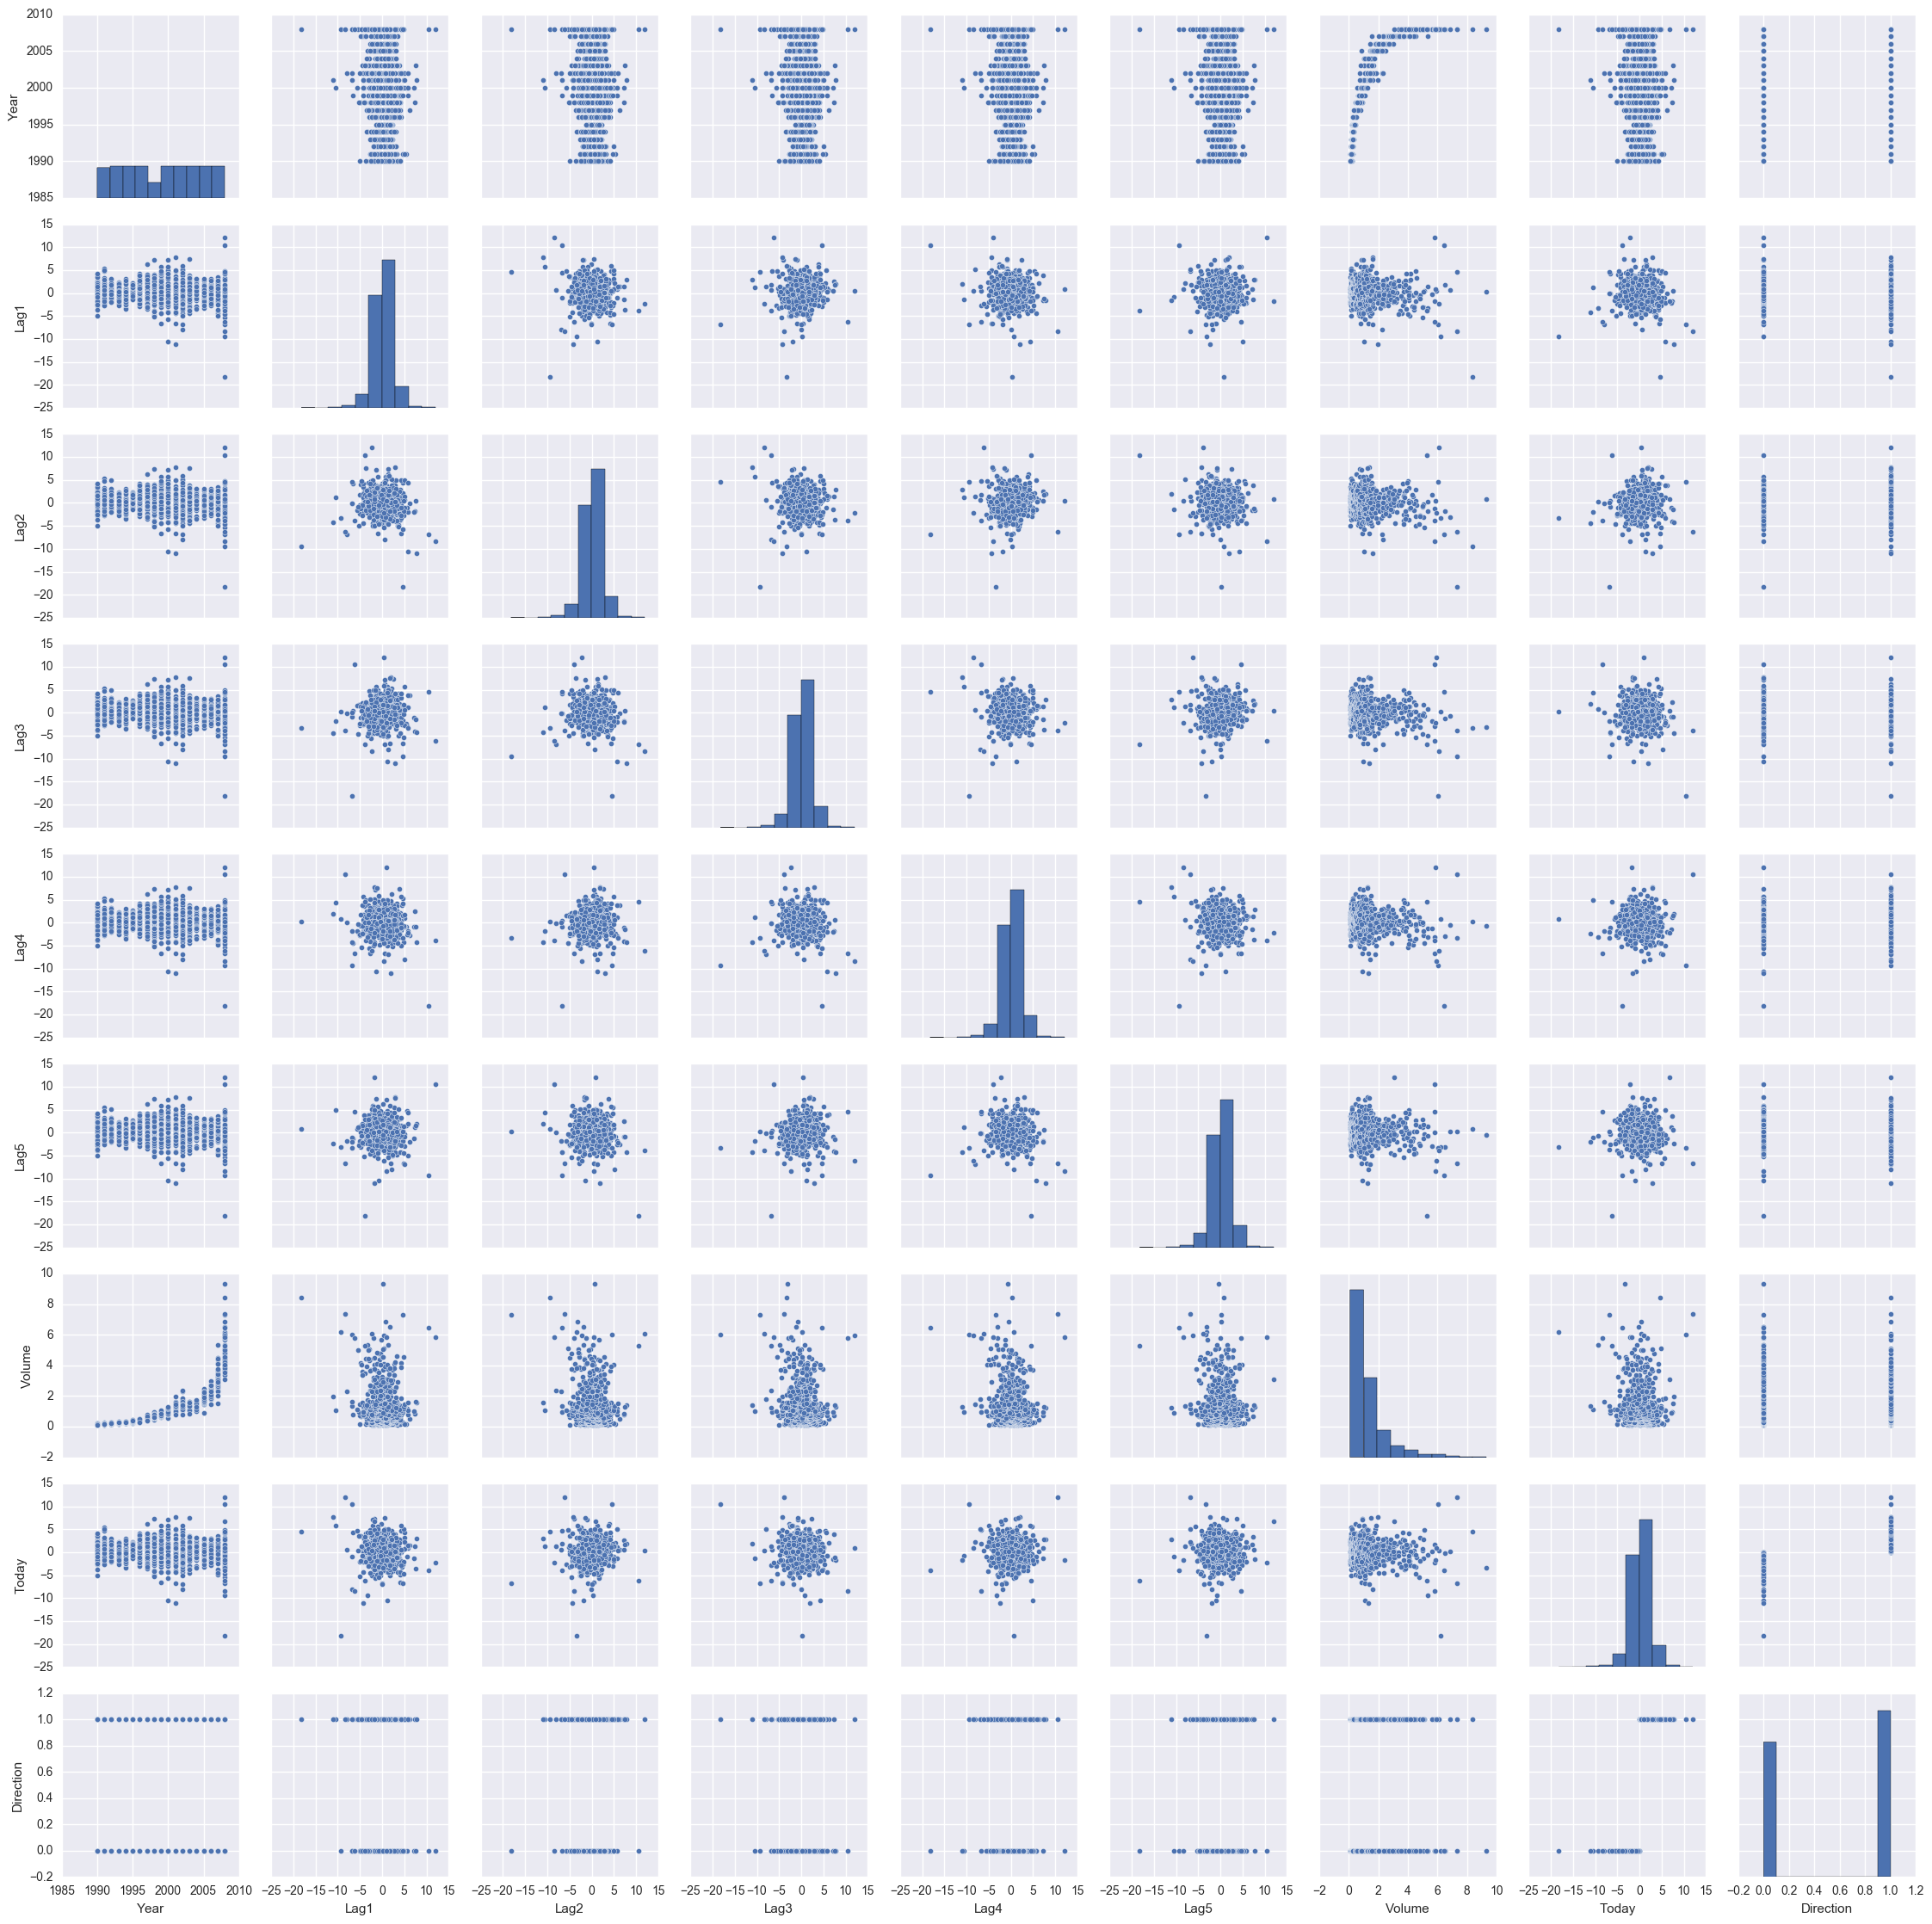

In [199]:
_ = sns.pairplot(weekly_train)
plt.show()

In [200]:
weekly_train.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.062350,-0.061578,-0.058062,-0.058800,-0.054142,0.821949,-0.057008,-0.040280
Lag1,-0.062350,1.000000,-0.087810,0.070184,-0.065834,0.008840,-0.119666,-0.089998,-0.065475
Lag2,-0.061578,-0.087810,1.000000,-0.088553,0.070198,-0.067673,-0.152012,0.071587,0.064911
Lag3,-0.058062,0.070184,-0.088553,1.000000,-0.088180,0.073291,-0.131249,-0.065122,-0.018993
Lag4,-0.058800,-0.065834,0.070198,-0.088180,1.000000,-0.087729,-0.119411,0.006208,-0.014678
Lag5,-0.054142,0.008840,-0.067673,0.073291,-0.087729,1.000000,-0.114505,-0.007118,-0.036883
Volume,0.821949,-0.119666,-0.152012,-0.131249,-0.119411,-0.114505,1.000000,-0.076343,-0.043668
Today,-0.057008,-0.089998,0.071587,-0.065122,0.006208,-0.007118,-0.076343,1.000000,0.718406
Direction,-0.040280,-0.065475,0.064911,-0.018993,-0.014678,-0.036883,-0.043668,0.718406,1.000000


Let's add Lag1, Lag2, Lag1*Lag2 as predictors in all four types of models. The logic behind this choice is that recent lags have more impact on direction of market return than historical data. Interaction between Lag1 and Lag2 indicates long-run trend.

In [201]:
ex_log_model = smf.logit('Direction ~ Lag1 + Lag2 + Lag1 * Lag2', weekly_train).fit()
direction_exlog_pred = np.where(ex_log_model.predict(weekly_test) >=0.5, 'Up', 'Down')
confusion_matrix(direction_test, direction_exlog_pred, labels=['Down', 'Up'])

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4


array([[ 7, 36],
       [ 8, 53]])

In [202]:
accuracy_score(direction_test, direction_exlog_pred)

0.57692307692307687

In [203]:
X_train = weekly_train[['Lag1', 'Lag2']]
X_train['Lag1Lag2'] = X_train.Lag1 * X_train.Lag2
X_test = weekly_test[['Lag1', 'Lag2']]
X_test['Lag1Lag2'] = X_test.Lag1 * X_test.Lag2
lda_ex_model = LinearDiscriminantAnalysis()
lda_ex_model.fit(X_train, direction_train)
direction_exlda_pred = lda_ex_model.predict(X_test)
confusion_matrix(direction_test, direction_exlda_pred, labels=['Down', 'Up'])

C:\Users\DMalygin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\DMalygin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[ 7, 36],
       [ 8, 53]])

In [204]:
accuracy_score(direction_test, direction_exlda_pred)

0.57692307692307687

In [205]:
qda_ex_model = QuadraticDiscriminantAnalysis()
qda_ex_model.fit(X_train, direction_train)
direction_exqda_pred = qda_ex_model.predict(X_test)
confusion_matrix(direction_test, direction_exqda_pred, labels=['Down', 'Up'])

array([[23, 20],
       [36, 25]])

In [206]:
accuracy_score(direction_test, direction_exqda_pred)

0.46153846153846156

In [207]:
knn1_ex_model = KNeighborsClassifier(n_neighbors=1)
knn1_ex_model.fit(X_train, direction_train)
direction_exknn1_pred = knn1_ex_model.predict(X_test)
confusion_matrix(direction_test, direction_exknn1_pred, labels=['Down', 'Up'])

array([[18, 25],
       [25, 36]])

In [208]:
accuracy_score(direction_test, direction_exknn1_pred)

0.51923076923076927

In [209]:
knn2_ex_model = KNeighborsClassifier(n_neighbors=2)
knn2_ex_model.fit(X_train, direction_train)
direction_exknn2_pred = knn2_ex_model.predict(X_test)
confusion_matrix(direction_test, direction_exknn2_pred, labels=['Down', 'Up'])

array([[32, 11],
       [45, 16]])

In [210]:
accuracy_score(direction_test, direction_exknn2_pred)

0.46153846153846156

In [211]:
knn5_ex_model = KNeighborsClassifier(n_neighbors=5)
knn5_ex_model.fit(X_train, direction_train)
direction_exknn5_pred = knn5_ex_model.predict(X_test)
confusion_matrix(direction_test, direction_exknn5_pred, labels=['Down', 'Up'])

array([[27, 16],
       [24, 37]])

In [212]:
accuracy_score(direction_test, direction_exknn5_pred)

0.61538461538461542

Of all models only KNN-5 showed best accuracy among all models with Lag1, Lag2 and Lag1*Lag2 as predictors, though it is worse than accuracy obtained with logistic regression with Lag2 regressor. Also, KNN-5 have lower type II error than other models.

#### 11 In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.  

(a) Create a binary variable, $mpg01$ , that contains a 1 if $mpg$ contains a value above its median, and a 0 if $mpg$ contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both $mpg01$ and the other Auto variables.  

In [213]:
auto = pd.read_csv('./Datasets/Auto.csv', index_col=0)

In [214]:
auto['mpg01'] = np.where(auto.mpg > auto.mpg.median(), 1, 0)

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01 ? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

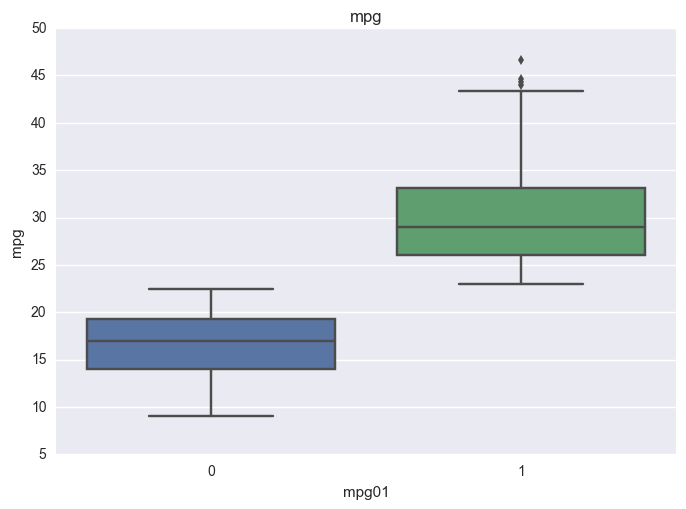

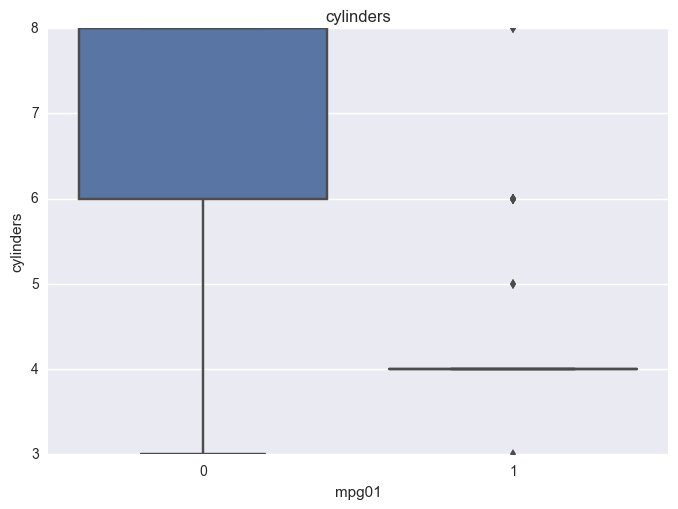

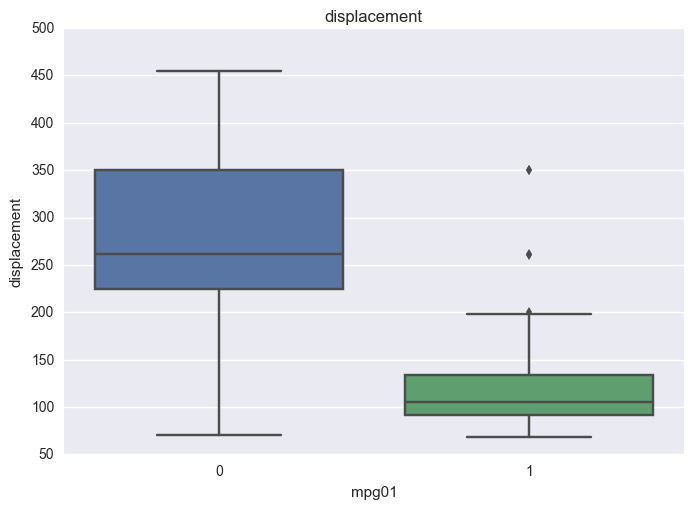

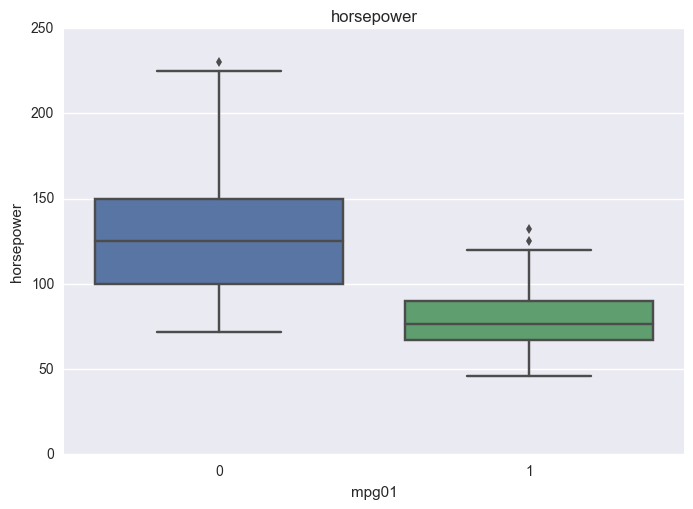

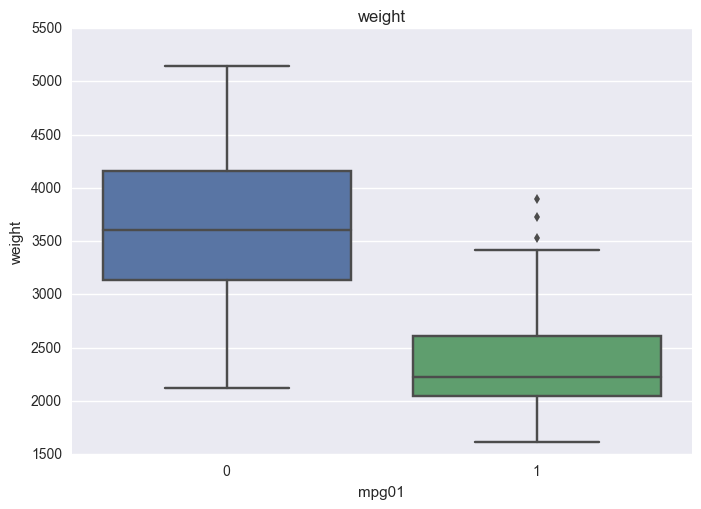

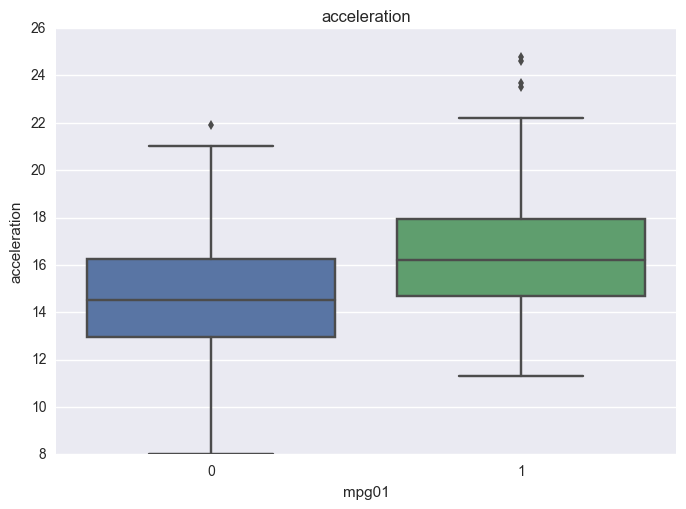

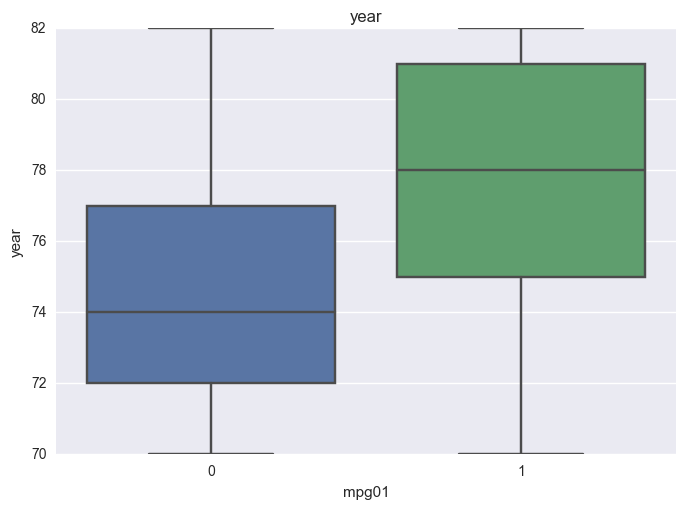

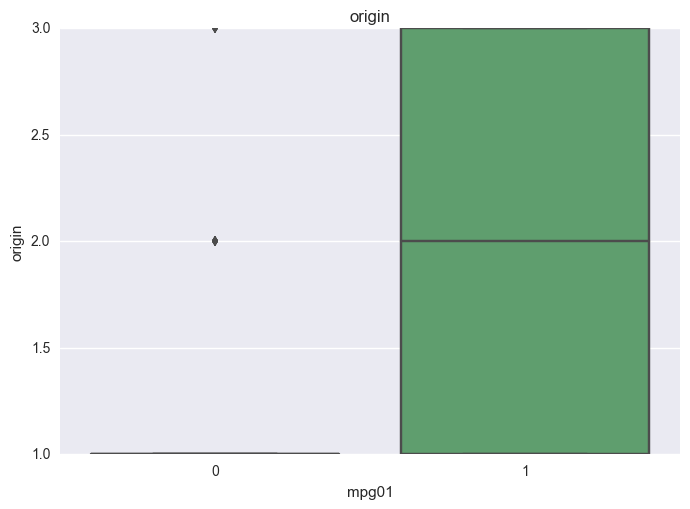

In [215]:
regressors = auto.columns.values[:-2]
for regressor in regressors:
    _ = sns.boxplot(x='mpg01', y=regressor, data=auto)
    _.set_title(regressor)
    plt.show()

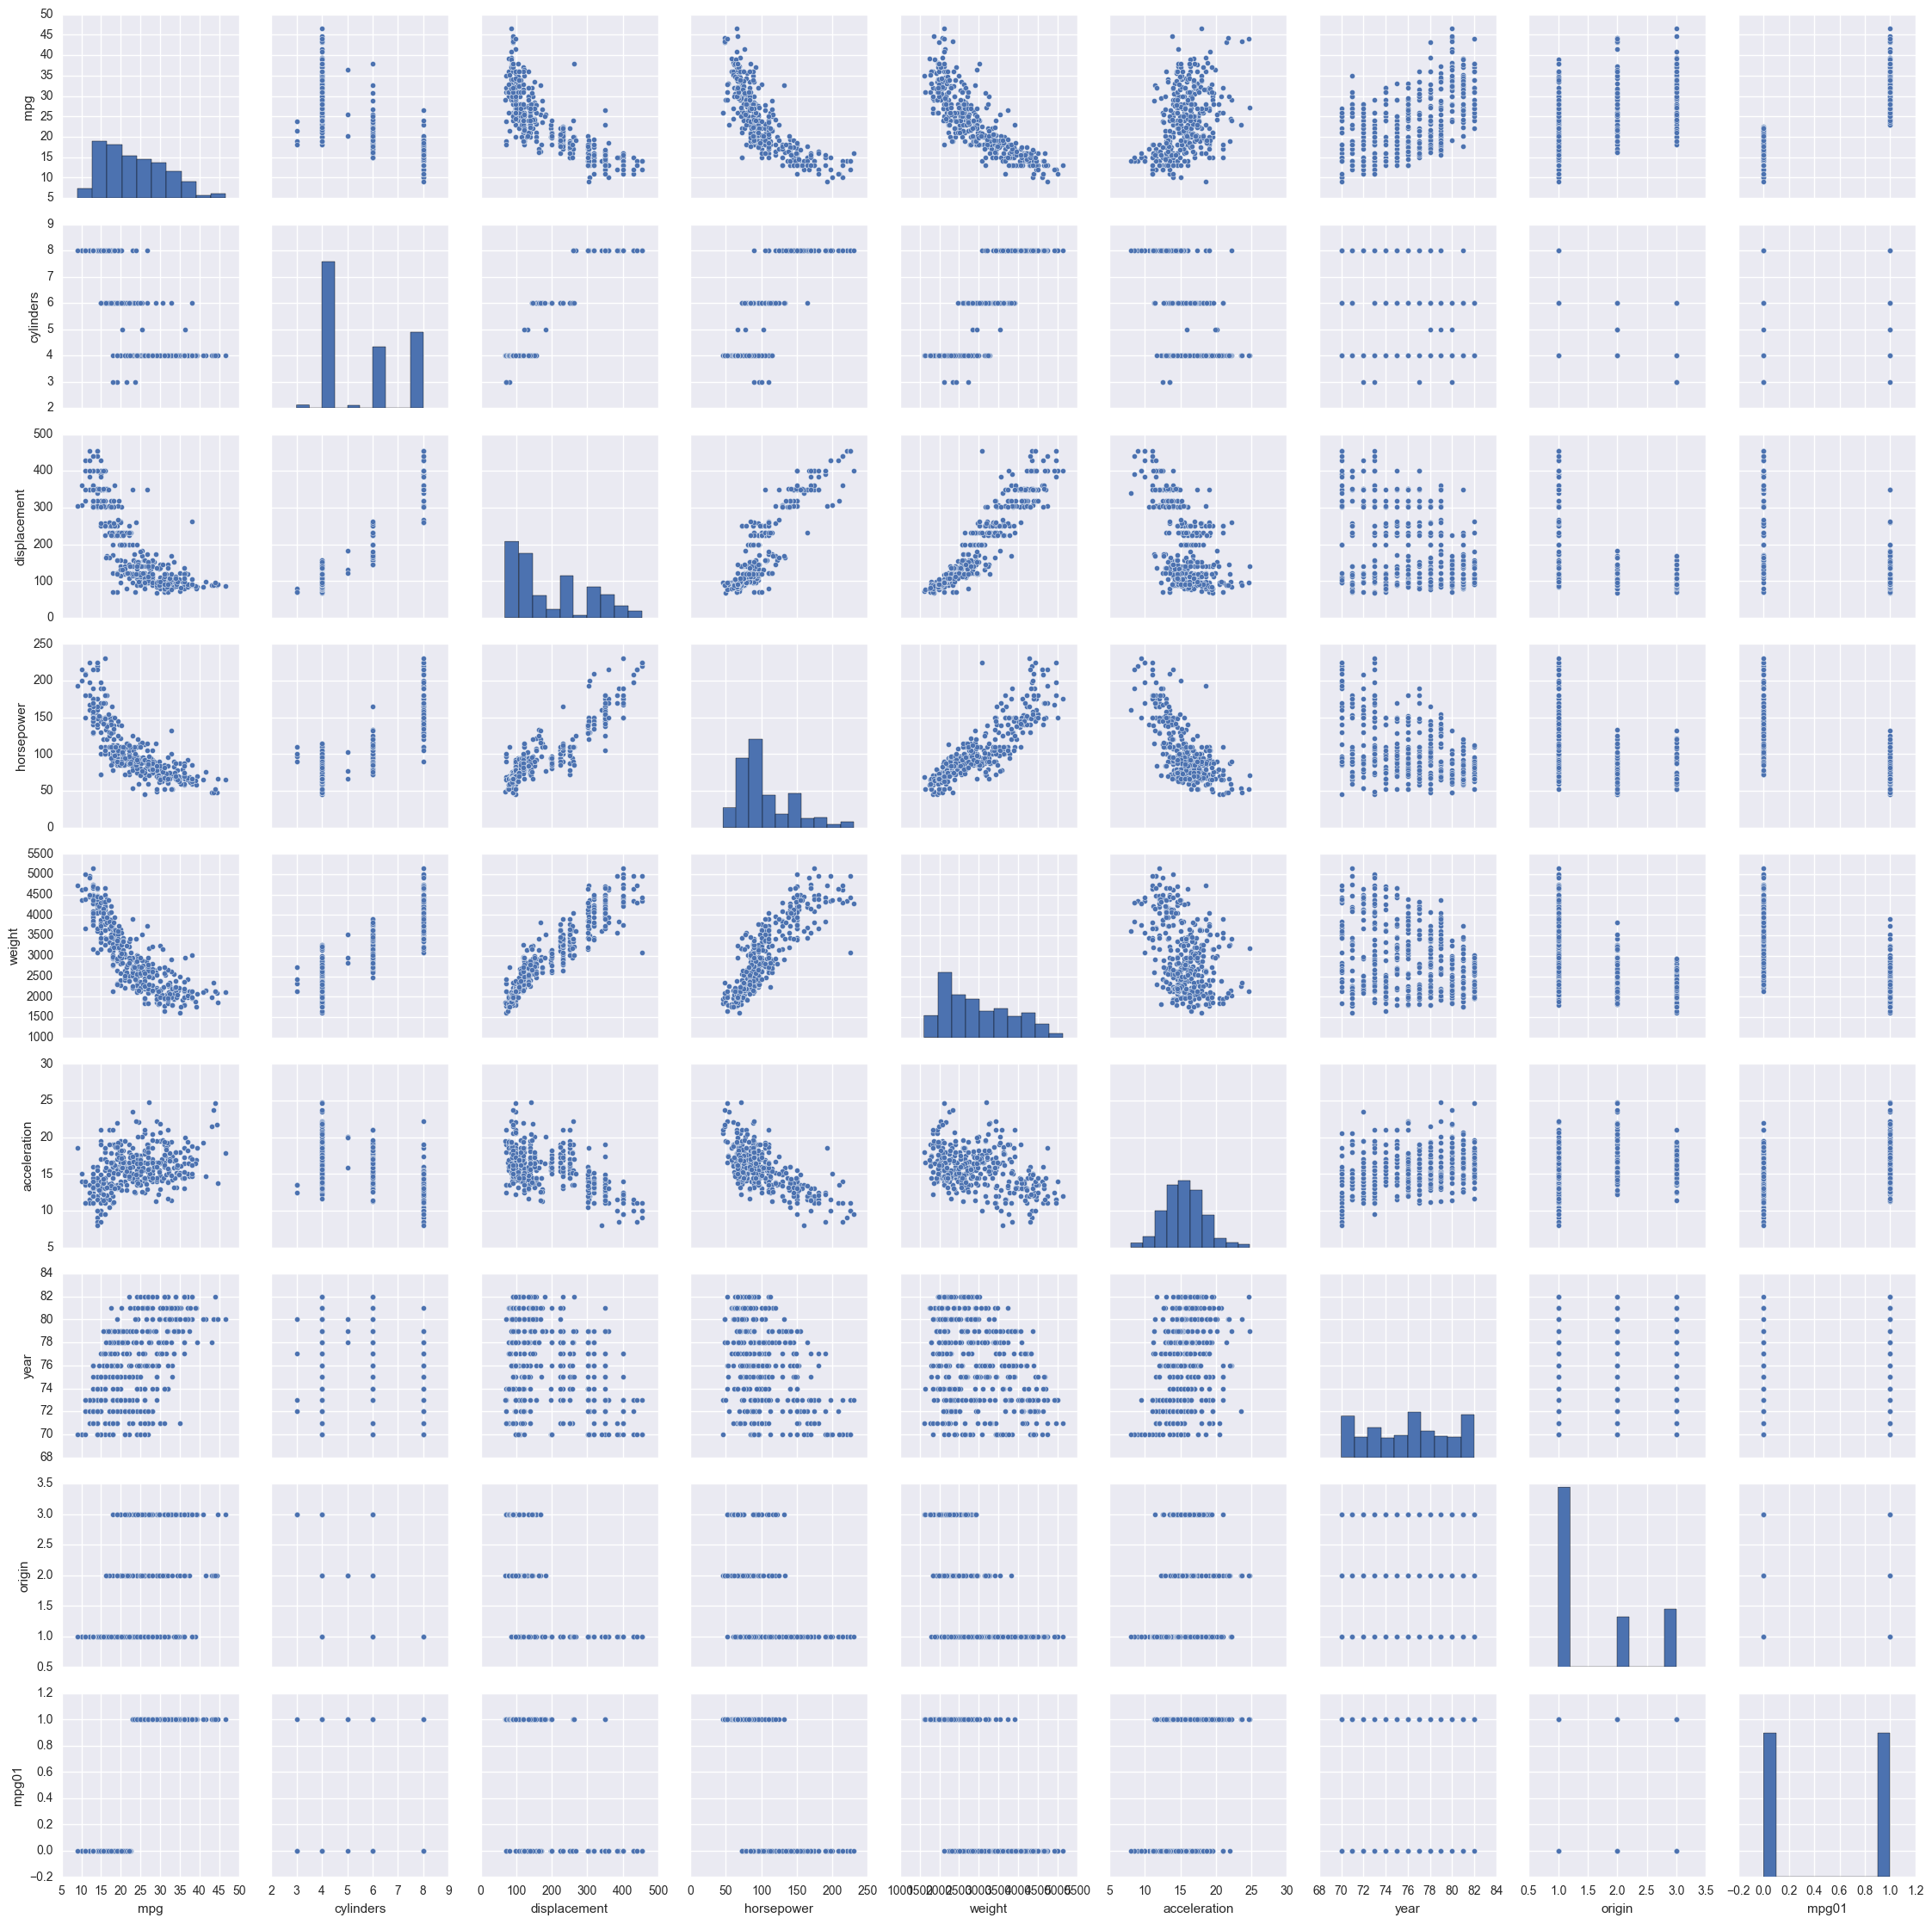

In [216]:
_ = sns.pairplot(data=auto)
plt.show()

We could use cylinders, displacement, horsepower, weight as predictors, because they have highest variation between mpg01 classes.

(c) Split the data into a training set and a test set.

In [217]:
X_auto = auto[['cylinders', 'displacement', 'horsepower', 'weight']]
y_auto = auto['mpg01']
X_auto_train, X_auto_test, y_auto_train, y_auto_test = train_test_split(X_auto, y_auto, test_size=0.2, random_state=777)

(d) Perform LDA on the training data in order to predict mpg01using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [218]:
lda_auto = LinearDiscriminantAnalysis()
lda_auto.fit(X_auto_train, y_auto_train)

print('Test error of LDA is {0:.2%}'.format(1-lda_auto.score(X_auto_test, y_auto_test)))

Test error of LDA is 11.39%


(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [219]:
qda_auto = QuadraticDiscriminantAnalysis()
qda_auto.fit(X_auto_train, y_auto_train)

print('Test error of QDA is {0:.2%}'.format(1-qda_auto.score(X_auto_test, y_auto_test)))

Test error of QDA is 10.13%


(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [220]:
log_auto = LogisticRegression()
log_auto.fit(X_auto_train, y_auto_train)

print('Test error of Logistic Regression is {0:.2%}'.format(1-log_auto.score(X_auto_test, y_auto_test)))

Test error of Logistic Regression is 12.66%


(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain?  
Which value of K seems to perform the best on this data set?

In [275]:
for n_neighbors in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_auto_train, y_auto_train)
    
    print('Test error of {0}-NN is {1:.2%}'.format(n_neighbors, 1-knn.score(X_auto_test, y_auto_test)))

Test error of 1-NN is 13.92%
Test error of 2-NN is 15.19%
Test error of 3-NN is 10.13%
Test error of 4-NN is 12.66%
Test error of 5-NN is 8.86%


#### 12 This problem involves writing functions.  
(a) Write a function, Power() , that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results.
Hint: Recall that $x^a$ raises $x$ to the power $a$. Use the print() function to output the result.

In [222]:
def power():
    print(2**3)
power()

8


(b) Create a new function, Power2() , that allows you to pass any two numbers, $x$ and $a$ , and prints out the value of $x^a$.

In [223]:
def power2(x, a):
    print(x**a)
power2(3, 8)

6561


(c) Using the Power2() function that you just wrote, compute $10^3$ ,$8^{17}$ , and $131^3$ 

In [226]:
power2(10, 3)
power2(8, 17)
power2(131, 3)

1000
2251799813685248
2248091


(d) Now create a new function, Power3() , that actually returns the result x^a as an R object, rather than simply printing it to the screen. 

In [228]:
def power3(x, a):
    return x**a

(e) Now using the Power3() function, create a plot of $f(x) = x^2$ . The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$ . Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale.

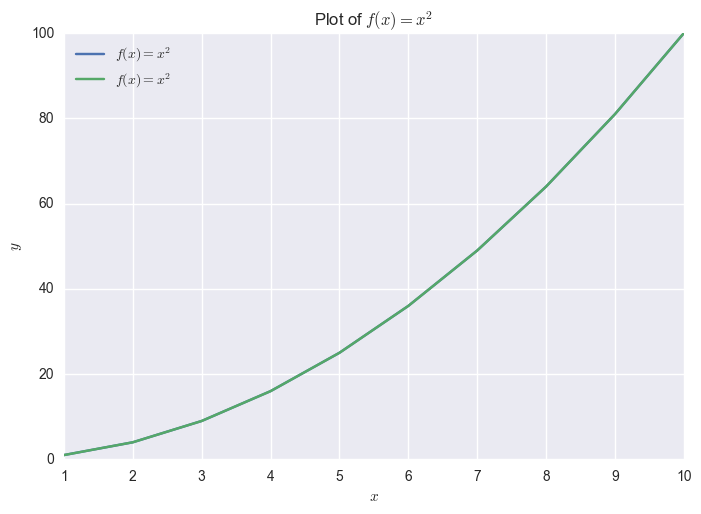

In [231]:
x = np.arange(1, 11)
y = power3(x, 2)
ax = plt.subplot(111)
ax.plot(x, y, label='$f(x)=x^2$')
ax.set_title('Plot of $f(x)=x^2$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='best')
plt.show()

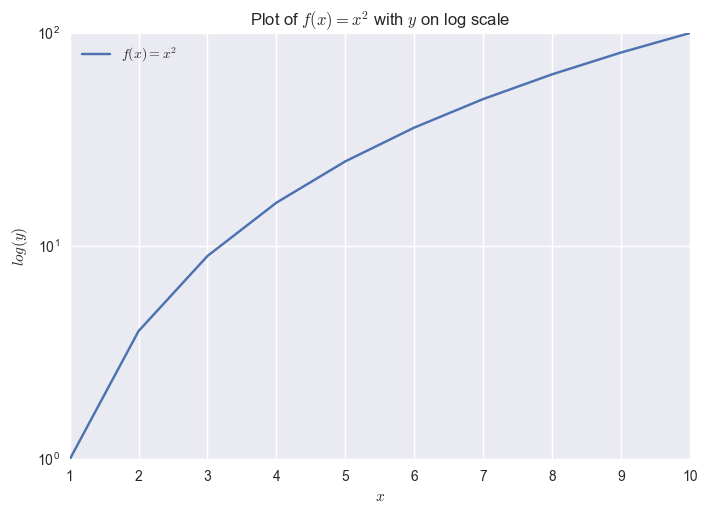

In [232]:
ax = plt.subplot(111)
ax.plot(x, y, label='$f(x)=x^2$')
ax.set_title('Plot of $f(x)=x^2$ with $y$ on log scale')
ax.set_xlabel('$x$')
ax.set_ylabel('$log(y)$')
ax.set_yscale('log')
ax.legend(loc='best')
plt.show()

(f) Create a function, PlotPower() , that allows you to create a plot of $x$ against $x^a$ for a fixed $a$ and for a range of values of $x$.

In [233]:
def plot_power(x, a):
    y = x**a
    ax = plt.subplot(111)
    ax.plot(x, y, label='$f(x)=x^{}$'.format(a))
    ax.set_title('Plot of $f(x)=x^{}$'.format(a))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend(loc='best')
    plt.show()

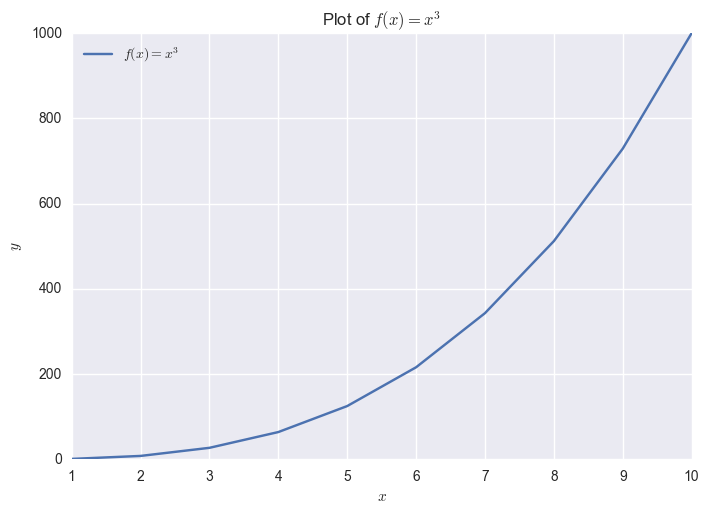

In [234]:
plot_power(np.arange(1, 11), 3)

#### 13 Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

In [235]:
boston = pd.read_csv('./Datasets/Boston.csv', index_col=0)
boston['crim01'] = np.where(boston.crim > boston.crim.median(), 1, 0)

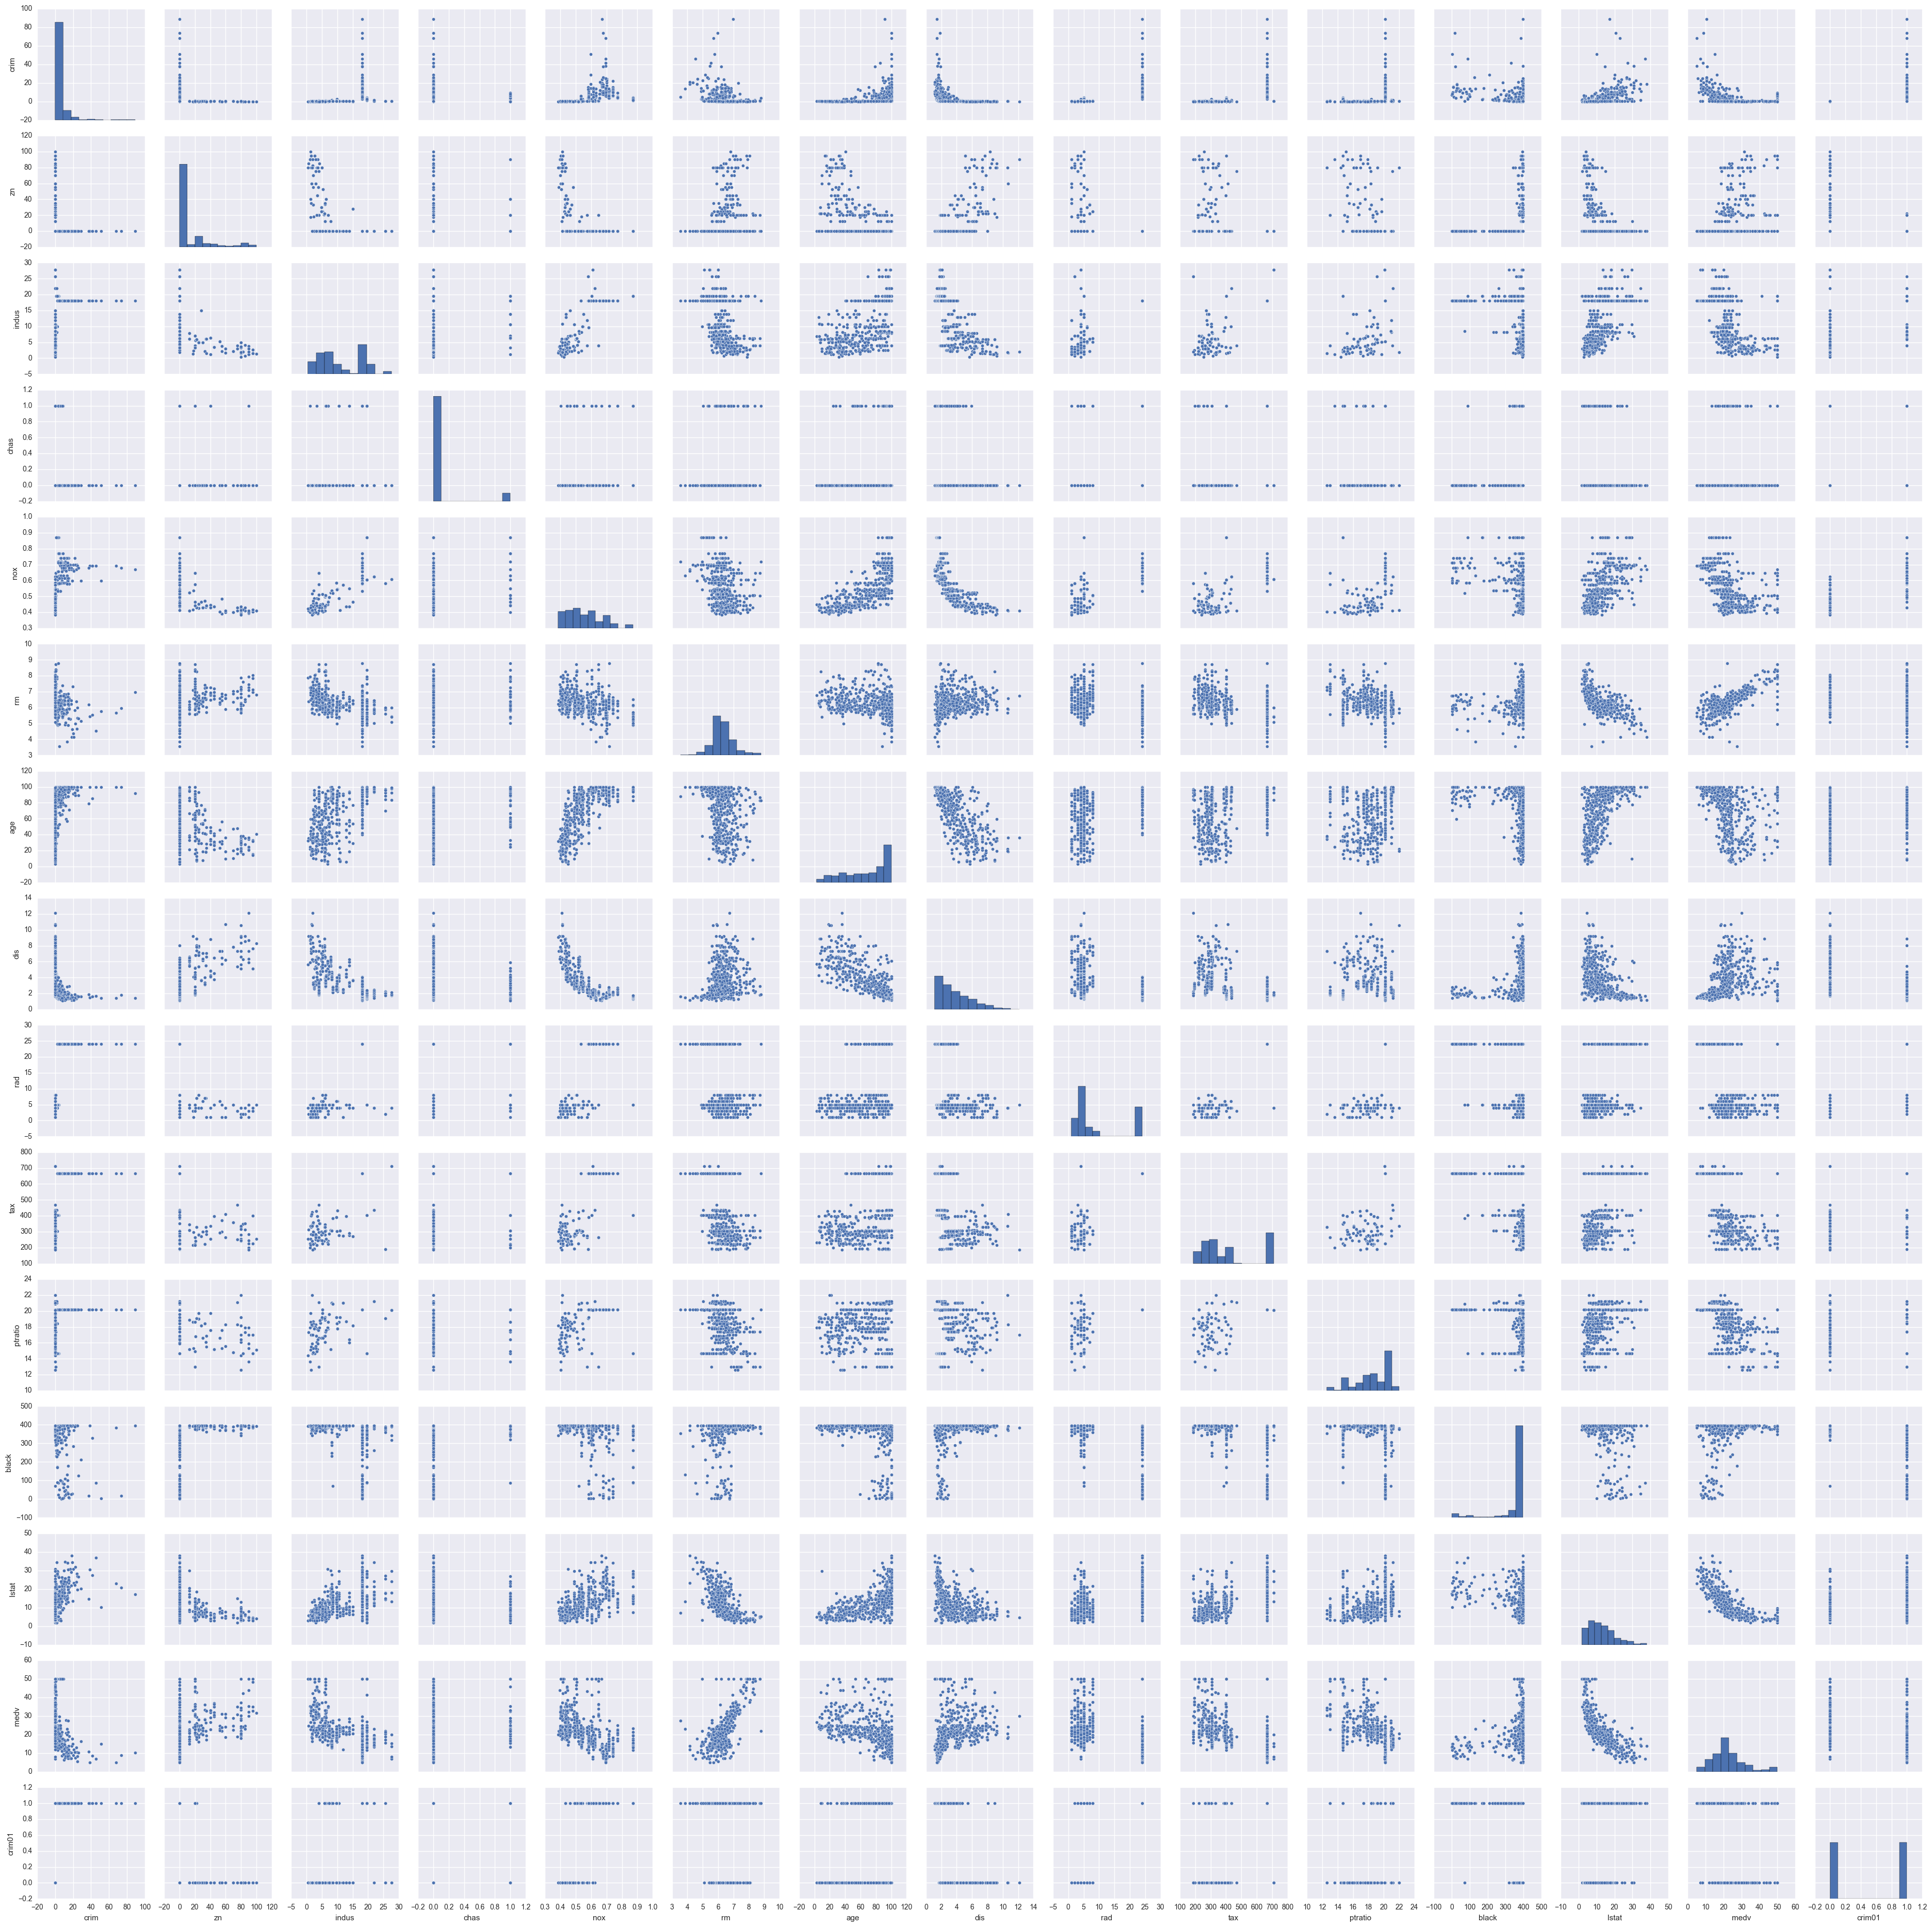

In [238]:
_ = sns.pairplot(data=boston)
plt.show()

In [244]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


As predictors I choose $indus, zn, nox, age, dis, rad, tax, ptratio, black, lstat, medv$ because this variables have high correlation with crime rate. Also I should try to estimate models with subsets of these variables.

In [249]:
X_bos = boston[['indus', 'zn', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']]
y_bos = boston['crim01']
X_bos_train, X_bos_test, y_bos_train, y_bos_test = train_test_split(X_bos, y_bos, test_size=0.2, random_state=777)

##### Logistic regression

In [252]:
bos_logr1 = sm.Logit(y_bos_train, X_bos_train).fit()
bos_logr1.summary()

Optimization terminated successfully.
         Current function value: 0.245781
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                           10
Date:                Wed, 30 Nov 2016   Pseudo R-squ.:                  0.6454
Time:                        15:51:03   Log-Likelihood:                -99.296
converged:                       True   LL-Null:                       -280.03
                                        LLR p-value:                 1.462e-71
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
indus         -0.0300      0.043     -0.702      0.483        -0.114     0.054
zn            -0.0758      0.031     -2.479      0.013        -0.136    -0.016
nox           22.5286      5.120      4.400      0.000        12.494    32.563
age            0.0232      0.010      2.303      0.021         0.003     0.043
dis            0.1313      0.183      0.718      0.473        -0.227     0.490
rad            0.5240      0.141      3.714      0.000         0.247     0.800
tax           -0.0080      0.003     -2.921      0.003        -0.013    -0.003
ptratio       -0.0145      0.107     -0.135      0.893        -0.225     0.196
black         -0.0362      0.009     -3.867      0.000        -0.055    -0.018
lstat         -0.0120      0.043     -0.281      0.779        -0.096     0.072
medv           0.0183      0.031      0.580      0.562        -0.043     0.080
==============================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [253]:
bos_logr1_pred = np.where(bos_logr1.predict(X_bos_test)>=0.5, 1, 0)
accuracy_score(y_bos_test, bos_logr1_pred)

0.90196078431372551

nox, age, dis have non-linear relationship with crim variable. Let's include 1/dis, log(nox) and log(age) in logistic model end exclude ptratio, indus, medv and lstat due to high p-value.

In [278]:
y_bos_train_t, X_bos_train_t = pt.dmatrices('crim01 ~ zn + nox + np.log(age) + np.power(dis, -1) + rad + tax + black', data=boston.ix[X_bos_train.index])
y_bos_test_t, X_bos_test_t = pt.dmatrices('crim01 ~ zn + nox + np.log(age) + np.power(dis, -1) + rad + tax + black', data=boston.ix[X_bos_test.index])
bos_logr2 = sm.Logit(y_bos_train_t, X_bos_train_t).fit()
bos_logr2.summary()

Optimization terminated successfully.
         Current function value: 0.223777
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 crim01   No. Observations:                  404
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            7
Date:                Wed, 30 Nov 2016   Pseudo R-squ.:                  0.6772
Time:                        16:27:06   Log-Likelihood:                -90.406
converged:                       True   LL-Null:                       -280.03
                                        LLR p-value:                 6.691e-78
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           -21.4401      4.408     -4.864      0.000       -30.079   -12.801
zn                   -0.0705      0.031     -2.262      0.024        -0.132    -0.009
nox                  42.6351      7.191      5.929      0.000        28.541    56.729
np.log(age)           0.8012      0.537      1.492      0.136        -0.251     1.854
np.power(dis, -1)    -7.6295      2.499     -3.053      0.002       -12.528    -2.731
rad                   0.6799      0.145      4.700      0.000         0.396     0.963
tax                  -0.0079      0.003     -2.996      0.003        -0.013    -0.003
black                -0.0083      0.006     -1.491      0.136        -0.019     0.003
=====================================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [269]:
bos_logr2_pred = np.where(bos_logr2.predict(X_bos_test_t)>=0.5, 1, 0)
accuracy_score(y_bos_test_t, bos_logr2_pred)


0.93137254901960786

Transforming and removing non-significant predictors from model increased accuracy by ~3%.

##### LDA

In [274]:
bos_lda1 = LinearDiscriminantAnalysis()
bos_lda1.fit(X_bos_train, y_bos_train)
bos_lda1.score(X_bos_test, y_bos_test)

0.87254901960784315

##### QDA

In [272]:
bos_qda1 = QuadraticDiscriminantAnalysis()
bos_qda1.fit(X_bos_train, y_bos_train)
bos_qda1.score(X_bos_test, y_bos_test)

0.89215686274509809

##### KNN

In [276]:
n = 10
for k in range(1, n+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_bos_train, y_bos_train)
    print('Accuracy for {0}-NN = {1:.2%}'.format(k, knn.score(X_bos_test, y_bos_test)))

Accuracy for 1-NN = 91.18%
Accuracy for 2-NN = 89.22%
Accuracy for 3-NN = 89.22%
Accuracy for 4-NN = 86.27%
Accuracy for 5-NN = 87.25%
Accuracy for 6-NN = 87.25%
Accuracy for 7-NN = 85.29%
Accuracy for 8-NN = 85.29%
Accuracy for 9-NN = 86.27%
Accuracy for 10-NN = 87.25%


So far best models in terms of test accuracy is Logistic regression (with transformation of predictors) and 1-NN.